## Mathematik für Biologiestudierende II

Sommersemester 2024

21.05.2024

&copy; 2024 Prof. Dr. Rüdiger W. Braun 

In [2]:
import numpy as np
import pandas as pd
from scipy import stats
from statsmodels.graphics.mosaicplot import mosaic
import seaborn as sns
sns.set_theme()

# $\chi^2$-Unabhängigkeitstest

## Anwendbarkeit

* Der $\chi^2$-Unabhängigkeitstest beruht auf einer Approximation
* Er ist nur zulässig, wenn alle erwarteten Werte mindestens den Wert 5 haben

## Erstellung der Kontingenztafel aus einer Tabelle 

In [15]:
df = sns.load_dataset("titanic")
df.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [33]:
tafel = pd.crosstab(df.pclass, df.alive)
tafel

alive,no,yes
pclass,,
1,80,136
2,97,87
3,372,119


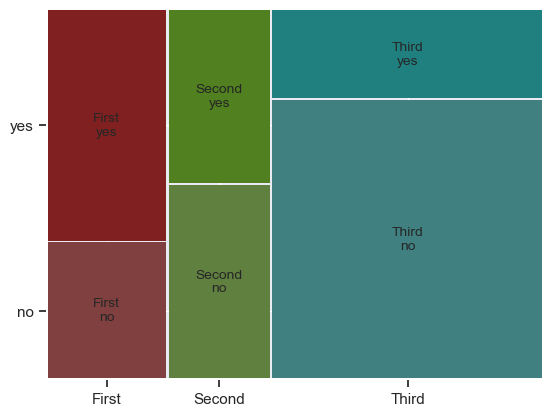

In [28]:
mosaic(tafel.stack());

In [34]:
res = stats.chi2_contingency(tafel)
res.pvalue

4.549251711298793e-23

## Python:  reservierte Worte

* Einige Worte wie `import` und `def` können nicht als Variablennamen verwendet werden
* Dazu gehört auch `class`
* Das ist die Ursache des folgenden Fehlers

In [38]:
# pd.crosstab(df.class, df.embark_town)   #  invalid syntax

SyntaxError: invalid syntax (49520074.py, line 1)

In [40]:
tafel = pd.crosstab(df['class'], df.embark_town)

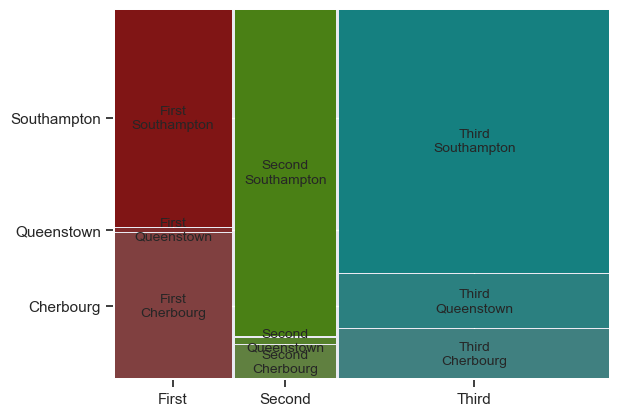

In [42]:
mosaic(tafel.stack());

In [29]:
tafel = pd.DataFrame(index=['Tag', 'Dämmerung'])
tafel['Mauerbienen'] = [131, 7]
tafel['Holzbienen'] = [18, 4]
tafel

,Mauerbienen,Holzbienen
Tag,131,18
Dämmerung,7,4


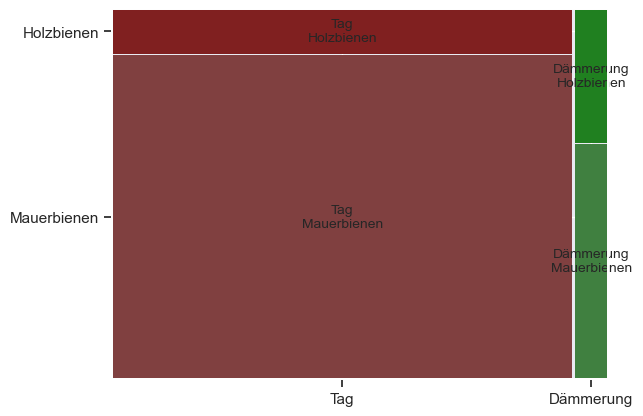

In [31]:
mosaic(tafel.stack());

In [11]:
stats.chi2_contingency(tafel)

Chi2ContingencyResult(statistic=3.251572948896344, pvalue=0.07135495132698412, dof=1, expected_freq=array([[128.5125,  20.4875],
       [  9.4875,   1.5125]]))

In [12]:
stats.fisher_exact(tafel)

SignificanceResult(statistic=4.158730158730159, pvalue=0.046533029009005966)